# **Data Preprocessing Assignment**

## **1. Loading the Dataset**

How can you load a dataset from a CSV file into a DataFrame using Python? Write code to achieve this, ensuring the file path is correct.

In [19]:
import pandas as pd
import numpy as np
import random

In [20]:
# Step 1


## **2. Inspecting the Dataset**

Once you load your dataset, what steps would you take to inspect its structure and content?
1. Write code to view available columns
2. Check the first few rows of the dataset

In [1]:
# Step 2.1

# Step 2.2


## **3. Stripping Spaces from Column Names**

If the column names in your dataset have leading or trailing spaces, they can cause errors or unexpected behavior. Write code to remove these spaces from all column names in the dataset to ensure consistency and avoid issues.

In [22]:
# Step 3


# Observe the column names in your dataset before and after applying this code.
data.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

## **4. Dropping Extra Columns**

You might want to consider that some columns in your dataset could be irrelevant to the task you're performing. For example, keeping the `Product` column may not make sense if your focus is solely on sales and numerical data.

It's a good practice to identify and drop such unnecessary columns from your DataFrame. This helps optimize memory usage for the task at hand and avoids wasting resources on irrelevant data.

For demo, let's drop columns `Segment` and `Country` from our analysis.

In [23]:
# Step 4


## **5. Handling Missing Values**

Missing values in a dataset can occur due to various reasons, such as incomplete data collection, system errors, or human oversight. These missing values can significantly impact the performance of data analysis and machine learning models, leading to inaccurate or biased results. 

Identifying and addressing missing values is a crucial step in data preprocessing. By understanding where missing values exist and how prevalent they are, you can decide on appropriate strategies to handle them, such as imputation or removal.

1. Write code to determine the total number of missing values in each column.
2. Write code to remove rows from the dataset where any column contains null values.
3. Can you research ways to handle null values and write about your findings?

In [24]:
# Step 5.1


# Step 5.2


Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price    61
Sale Price             50
Gross Sales            25
Discounts              40
Sales                  26
COGS                   62
Profit                 17
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64


In [25]:
# Step 5.3




## **6. Converting String Values to Numeric**

In the dataset, some columns that should contain numeric values are currently stored as strings. To perform numerical operations or modeling, these columns must be converted to a proper numeric format.

1. Inspect the dataset to identify columns that should be numeric but are currently stored as strings, and add them to the provided list.
2. Remove the dollar sign (`$`) and commas (`,`) from these values to prepare them for conversion into numeric format.

In [26]:
# Step 6.1


# Step 6.2
def clean_values(value):
    # Replace the '$' and ',' characters with an empty string ('') and remove leading and trailing spaces from the value.
    # write function here and return the transformed value
    pass

# Use apply method to transform the columns using 'clean_values' function
for column in numeric_columns:
    data[column] = data[column].apply(clean_values)
    data[column] = pd.to_numeric(data[column], errors = "coerce")

## **7. Working with dates**

Datasets often contain fields for dates and timestamps, which can be represented in various formats. When data is collected and combined from multiple sources, inconsistencies in date and timestamp formats can occur. These discrepancies can lead to errors during analysis or processing, making it essential to standardize and validate these fields.

Follow these steps to clean the date field from our data.

1. Find unique length of column `Date`
2. Apply the function `standardize_date` to format date value

In [27]:
# Step 7.1


array([10,  8, 11])

In [28]:
from datetime import datetime

def standardize_date(value):    
    # Check length of the date string and apply appropriate parsing
    if len(value) == 8:  # Example: 01/08/14
        return datetime.strptime(value, '%m/%d/%y').strftime('%m/%d/%Y')
    elif len(value) == 10 and '/' in value:  # Example: 01/10/2013
        return datetime.strptime(value, '%m/%d/%Y').strftime('%m/%d/%Y')
    elif len(value) >= 11:  # Example: Jan 11 2014
        return datetime.strptime(value, '%b %d %Y').strftime('%m/%d/%Y')
    else:
        return None  # Return None for unhandled cases

# Step 7.2


## **8. Data Visualization**

At this stage, it's important to pause and think carefully about our next step. What is your ultimate goal? What do you intend to achieve with the data? If your task is to create visualizations, then we are nearly finished with data pre-processing. Visualizations are an excellent way to extract meaningful insights from data. In some cases, they provide better insights than machine learning models.

Python offers a powerful libraries called `matplotlib` and `seaborn` for creating visualizations, and it integrates seamlessly with pandas DataFrames. Here are some demo visualitzations on our dataset. Observe and comment your findings.

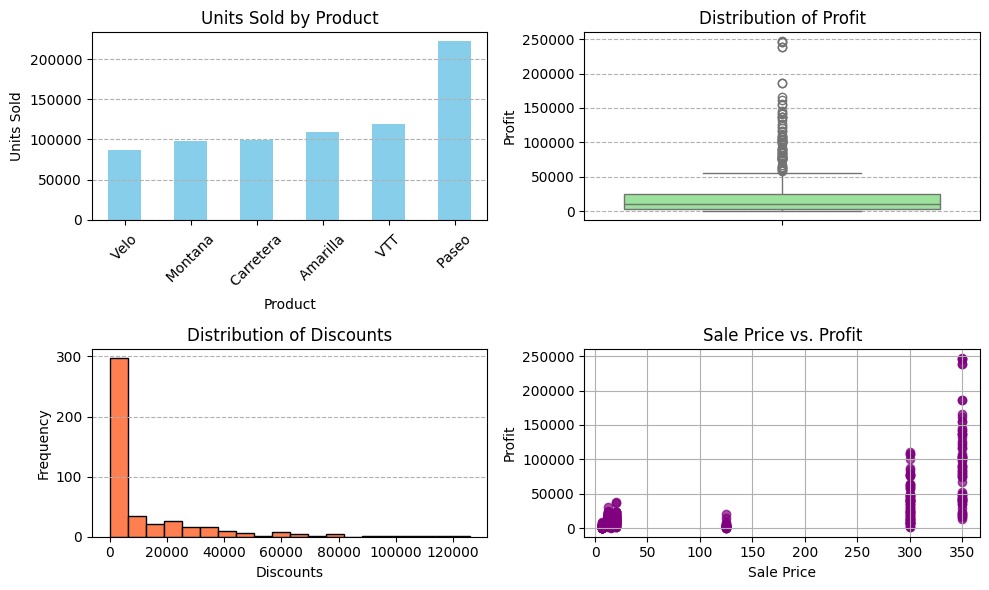

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

data.groupby('Product')['Units Sold'].sum().sort_values().plot(
    kind='bar', color='skyblue', ax=axes[0, 0]
)
axes[0, 0].set_title('Units Sold by Product')
axes[0, 0].set_xlabel('Product')
axes[0, 0].set_ylabel('Units Sold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--')

sns.boxplot(y=data['Profit'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Profit')
axes[0, 1].set_ylabel('Profit')
axes[0, 1].grid(axis='y', linestyle='--')

axes[1, 0].hist(data['Discounts'], bins=20, color='coral', edgecolor='black')
axes[1, 0].set_title('Distribution of Discounts')
axes[1, 0].set_xlabel('Discounts')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', linestyle='--')

axes[1, 1].scatter(data['Sale Price'], data['Profit'], alpha=0.7, color='purple')
axes[1, 1].set_title('Sale Price vs. Profit')
axes[1, 1].set_xlabel('Sale Price')
axes[1, 1].set_ylabel('Profit')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Step 8




## **9. Standardization of Numeric Columns**

Before training a machine learning model, features are standardized (scaled to have a mean of 0 and variance of 1) to ensure faster and more stable convergence. Gradient descent is sensitive to feature scales, and standardization ensures all features contribute equally to optimization.

![image.png](https://editor.analyticsvidhya.com/uploads/25665ezgif.com-gif-maker.gif)

For example, `Sale Price` might range from hundreds to thousands, while `Profit` might range from tens to hundreds. Without standardization, algorithms may treat `Sale Price` as more important just because it has larger values.

Follow these steps to perform Standardization using `scikit-learn` python library.

1. Initialize the scaler
2. Apply standardization on dataframe using `fit_transform` method

In [12]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ["Units Sold", "Manufacturing Price", "Sale Price", "Gross Sales", "Discounts", "Sales", "COGS", "Profit"]

# Step 9.1


# Step 9.2


**Observation**

After standardization, all numeric columns will have values with a mean of approximately 0 and a standard deviation of 1. This allows fair comparisons and consistent contributions from all columns.

In [13]:
data.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,4.170000e+02,417.000000,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,4.170000e+02,417.000000,417.000000
mean,7.667727e-17,0.000000,2.129924e-17,-3.407879e-17,-3.407879e-17,-2.555909e-17,-8.519697e-18,-3.407879e-17,8.110312,2013.741007
std,1.001201e+00,1.001201,1.001201e+00,1.001201e+00,1.001201e+00,1.001201e+00,1.001201e+00,1.001201e+00,3.327091,0.438608
min,-1.567874e+00,-0.851098,-7.903821e-01,-6.859069e-01,-5.371746e-01,-6.850706e-01,-6.716298e-01,-6.491852e-01,1.000000,2013.000000
25%,-8.036956e-01,-0.833161,-7.557592e-01,-6.288820e-01,-5.091260e-01,-6.291867e-01,-6.418085e-01,-5.611097e-01,6.000000,2013.000000
50%,-7.040417e-02,-0.788318,-7.003625e-01,-5.663353e-01,-4.425832e-01,-5.639821e-01,-5.810614e-01,-3.958675e-01,9.000000,2014.000000
75%,6.731830e-01,1.364162,1.238520e+00,3.510897e-01,-6.544438e-02,3.063080e-01,3.818518e-01,-5.729185e-02,11.000000,2014.000000
max,3.322069e+00,1.453849,1.584750e+00,3.738742e+00,5.096722e+00,3.626509e+00,3.958725e+00,5.172833e+00,12.000000,2014.000000


**Conclusion**

Preprocessing is a critical step in preparing data for machine learning as it ensures consistency, removes ambiguities, and transforms the data into a format suitable for analysis. In this assignment, we standardized numeric columns and converted inconsistent date formats, enabling fair comparisons and reducing biases in the dataset. These steps ensure that the dataset is clean, uniform, and ready for applying machine learning models effectively.